In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Data: Start by loading the data into a pandas DataFrame. If it's a CSV file, you would use pandas.read_csv().

In [3]:
# Replace 'your_data.csv' with the path to your data file
df = pd.read_csv('data/fraud.csv')

##Identify the Features and Their Types:
Use .info() to get a concise summary of the DataFrame, including the column names, non-null counts, and data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
#To get the unique data types present in the DataFrame, you can use:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [5]:
#Determine the Size of the Dataset: Use .shape to find out the number of rows (samples) and columns (features).
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 6362620 rows and 11 columns.


In [6]:
#Understand What Each Feature Represents: a quick glance at the column names
print(df.columns.tolist())

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [7]:
# display the first few rows to get a feel for the values each feature contains:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
# Perform a Descriptive Statistical Summary:
#Use .describe() to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.
summary_stats=df.describe(include='all')  # include='all' will also summarize categorical data
print(summary_stats)

                step      type        amount     nameOrig  oldbalanceOrg  \
count   6.362620e+06   6362620  6.362620e+06      6362620   6.362620e+06   
unique           NaN         5           NaN      6353307            NaN   
top              NaN  CASH_OUT           NaN  C1902386530            NaN   
freq             NaN   2237500           NaN            3            NaN   
mean    2.433972e+02       NaN  1.798619e+05          NaN   8.338831e+05   
std     1.423320e+02       NaN  6.038582e+05          NaN   2.888243e+06   
min     1.000000e+00       NaN  0.000000e+00          NaN   0.000000e+00   
25%     1.560000e+02       NaN  1.338957e+04          NaN   0.000000e+00   
50%     2.390000e+02       NaN  7.487194e+04          NaN   1.420800e+04   
75%     3.350000e+02       NaN  2.087215e+05          NaN   1.073152e+05   
max     7.430000e+02       NaN  9.244552e+07          NaN   5.958504e+07   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
count     6.3626

In [4]:
#Identify Skewness:
#Check the skewness of the distribution of your numerical data. A skewness value closer to 0 indicates a more symmetric distribution, while a value far from 0 indicates a skewed distribution.
skewness = df.skew()
print(skewness)


step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64


C:\Users\jdche\AppData\Local\Temp\ipykernel_25728\2929545844.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


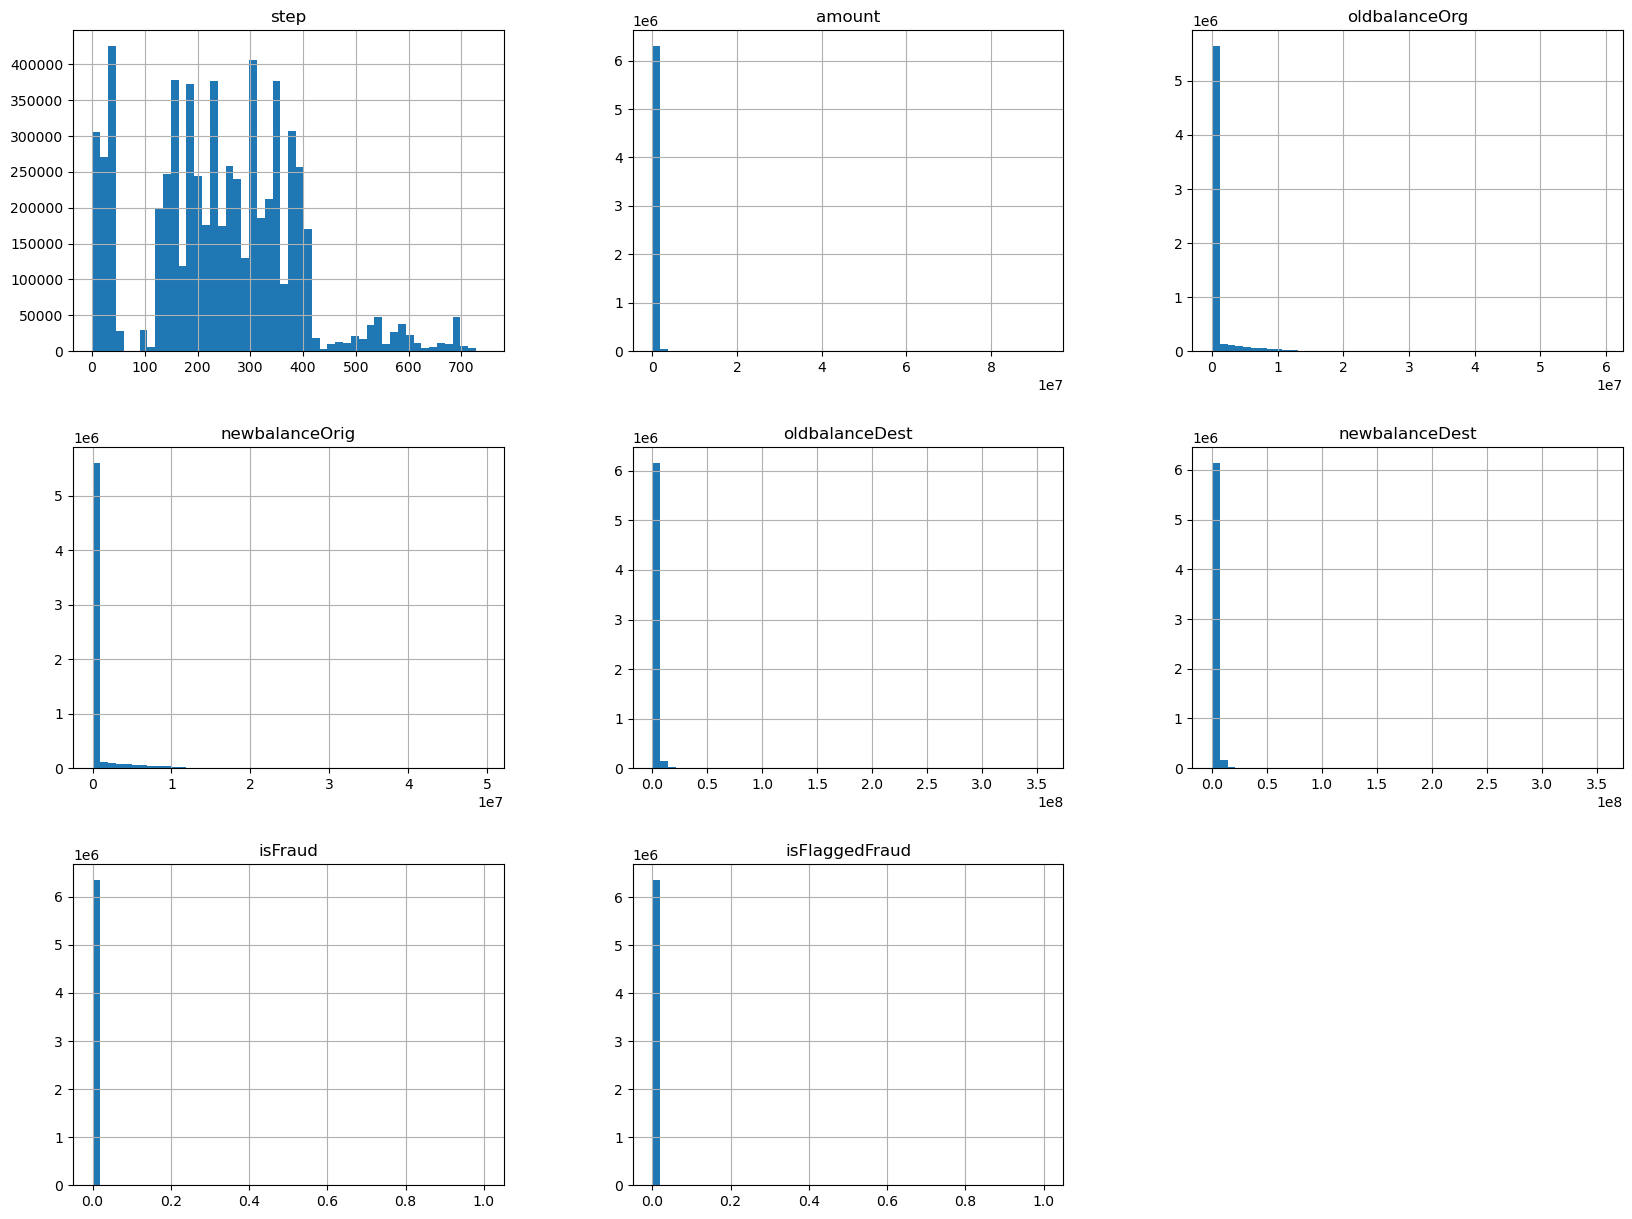

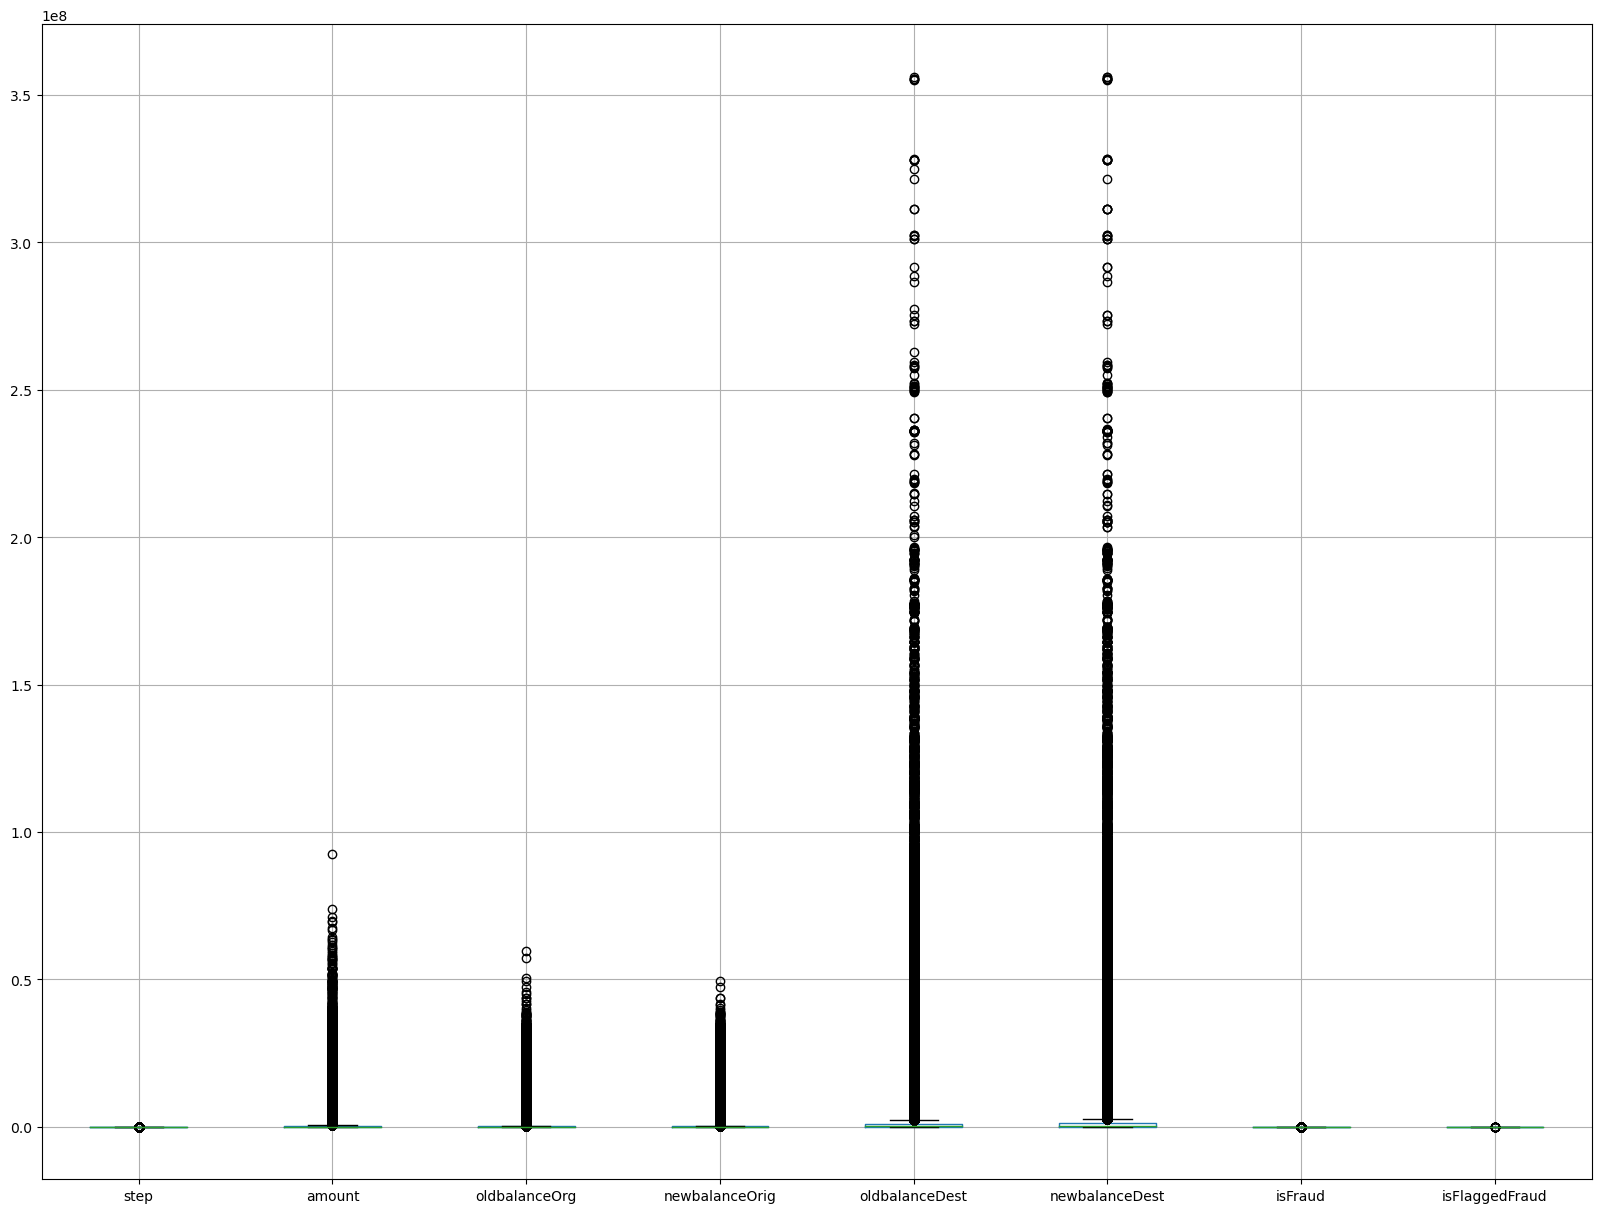

In [5]:
#Visualize Distributions: Univariate Analysis
#Use histograms and boxplots to visually inspect the shape and spread of your data. Histograms help you see the distribution of the data, while boxplots show the median, quartiles, and potential outliers.

# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

# Boxplot
df.boxplot(figsize=(20,15))
plt.show()

In [8]:
#Determine the Target Variable: Identify which column in your dataset represents the target variable for classification. In fraud detection, this column typically has binary values where one value represents 'fraud' and the other represents 'not fraud'.
#Count the Values of Each Class in the target variable to see the number of instances of each class:
# Replace 'isFraud' with the name of your target variable column
class_distribution = df['isFraud'].value_counts()
print(class_distribution)

0    6354407
1       8213
Name: isFraud, dtype: int64


In [9]:
# Calculate the Proportions of each class to see the relative sizes:
class_proportions = df['isFraud'].value_counts(normalize=True)
print(class_proportions)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64


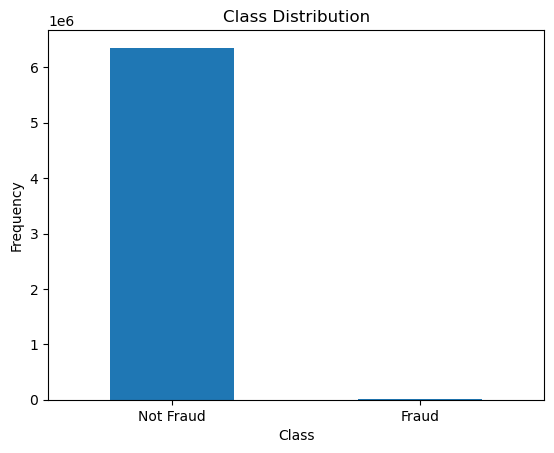

In [10]:
#Visualize the Class Distribution with a bar chart for a clear understanding of the imbalance:

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)  # Adjust labels as appropriate
plt.show()

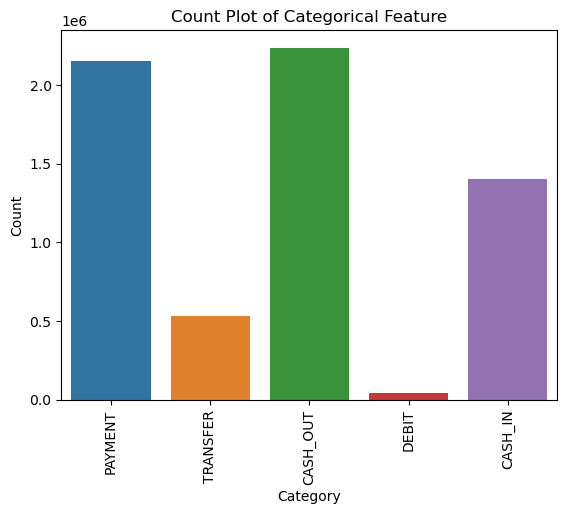

In [11]:
# For Categorical Variables:
# Bar Charts show the frequency of each category.
import seaborn as sns

# Replace 'category_feature' with the name of your categorical feature
sns.countplot(x='type', data=df)
plt.title('Count Plot of Categorical Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels if they overlap
plt.show()

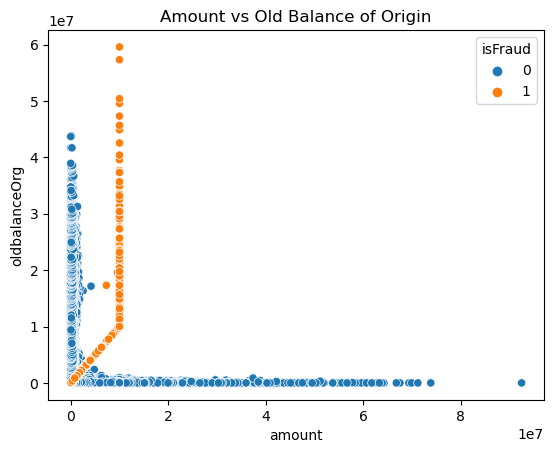

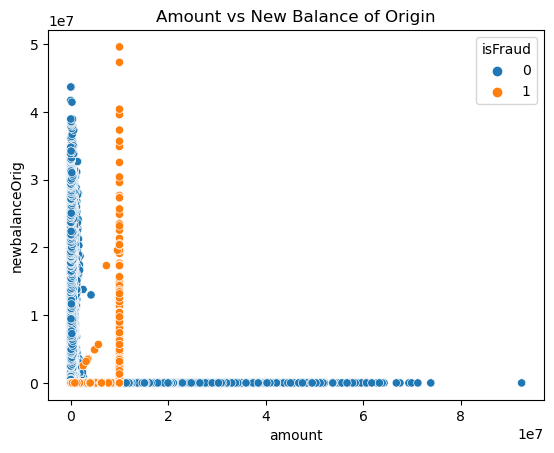

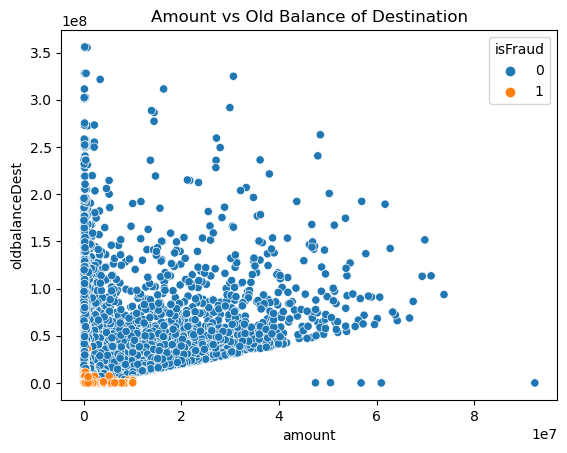

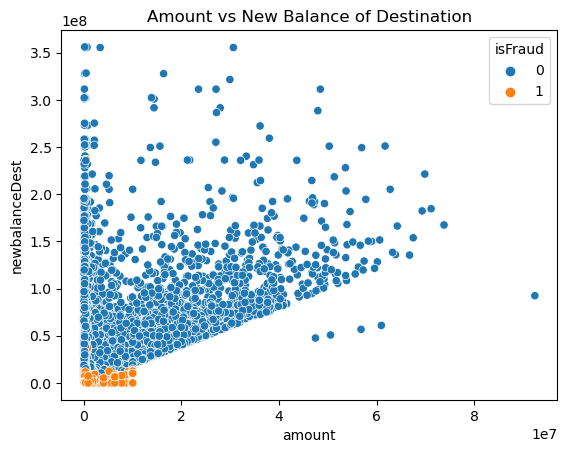

In [12]:
# Transaction Amount vs. Old/New Balance:
#Scatter plots to see if there is a correlation between transaction amounts and the original or new balances in the accounts.
# Use separate plots for origin and destination accounts.
sns.scatterplot(x='amount', y='oldbalanceOrg', data=df, hue='isFraud')
plt.title('Amount vs Old Balance of Origin')
plt.show()

sns.scatterplot(x='amount', y='newbalanceOrig', data=df, hue='isFraud')
plt.title('Amount vs New Balance of Origin')
plt.show()

sns.scatterplot(x='amount', y='oldbalanceDest', data=df, hue='isFraud')
plt.title('Amount vs Old Balance of Destination')
plt.show()

sns.scatterplot(x='amount', y='newbalanceDest', data=df, hue='isFraud')
plt.title('Amount vs New Balance of Destination')
plt.show()

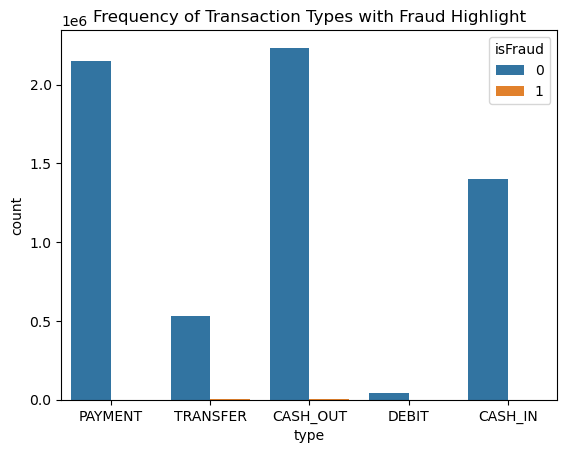

In [9]:
# Frequency of Transaction Types:
# A count plot to see the distribution of different types of transactions and how they relate to fraud.
# This could help determine if certain transaction types are more associated with fraud.
sns.countplot(x='type', data=df, hue='isFraud')
plt.title('Frequency of Transaction Types with Fraud Highlight')
plt.show()

In [13]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If there are missing values, drop those rows
"""
if missing_values.any():
    train = train.dropna()
    print("Rows with missing values have been dropped.")
    
"""

Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


'\nif missing_values.any():\n    train = train.dropna()\n    print("Rows with missing values have been dropped.")\n    \n'

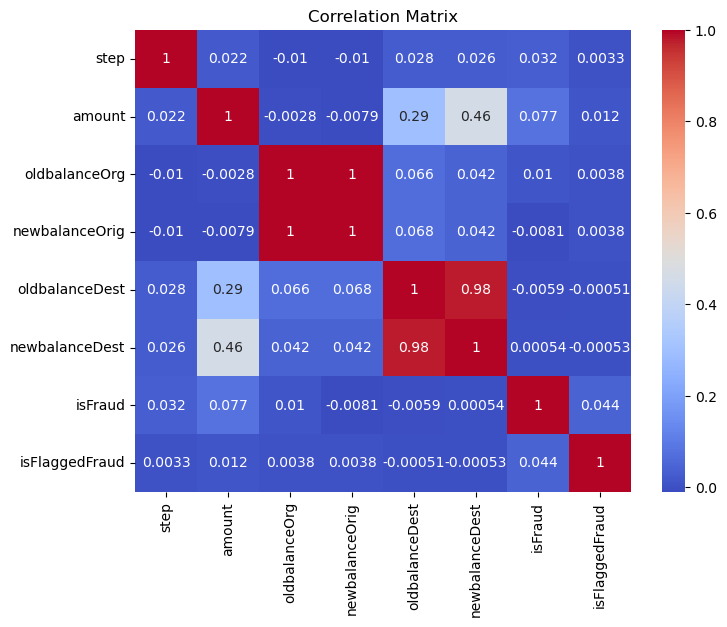

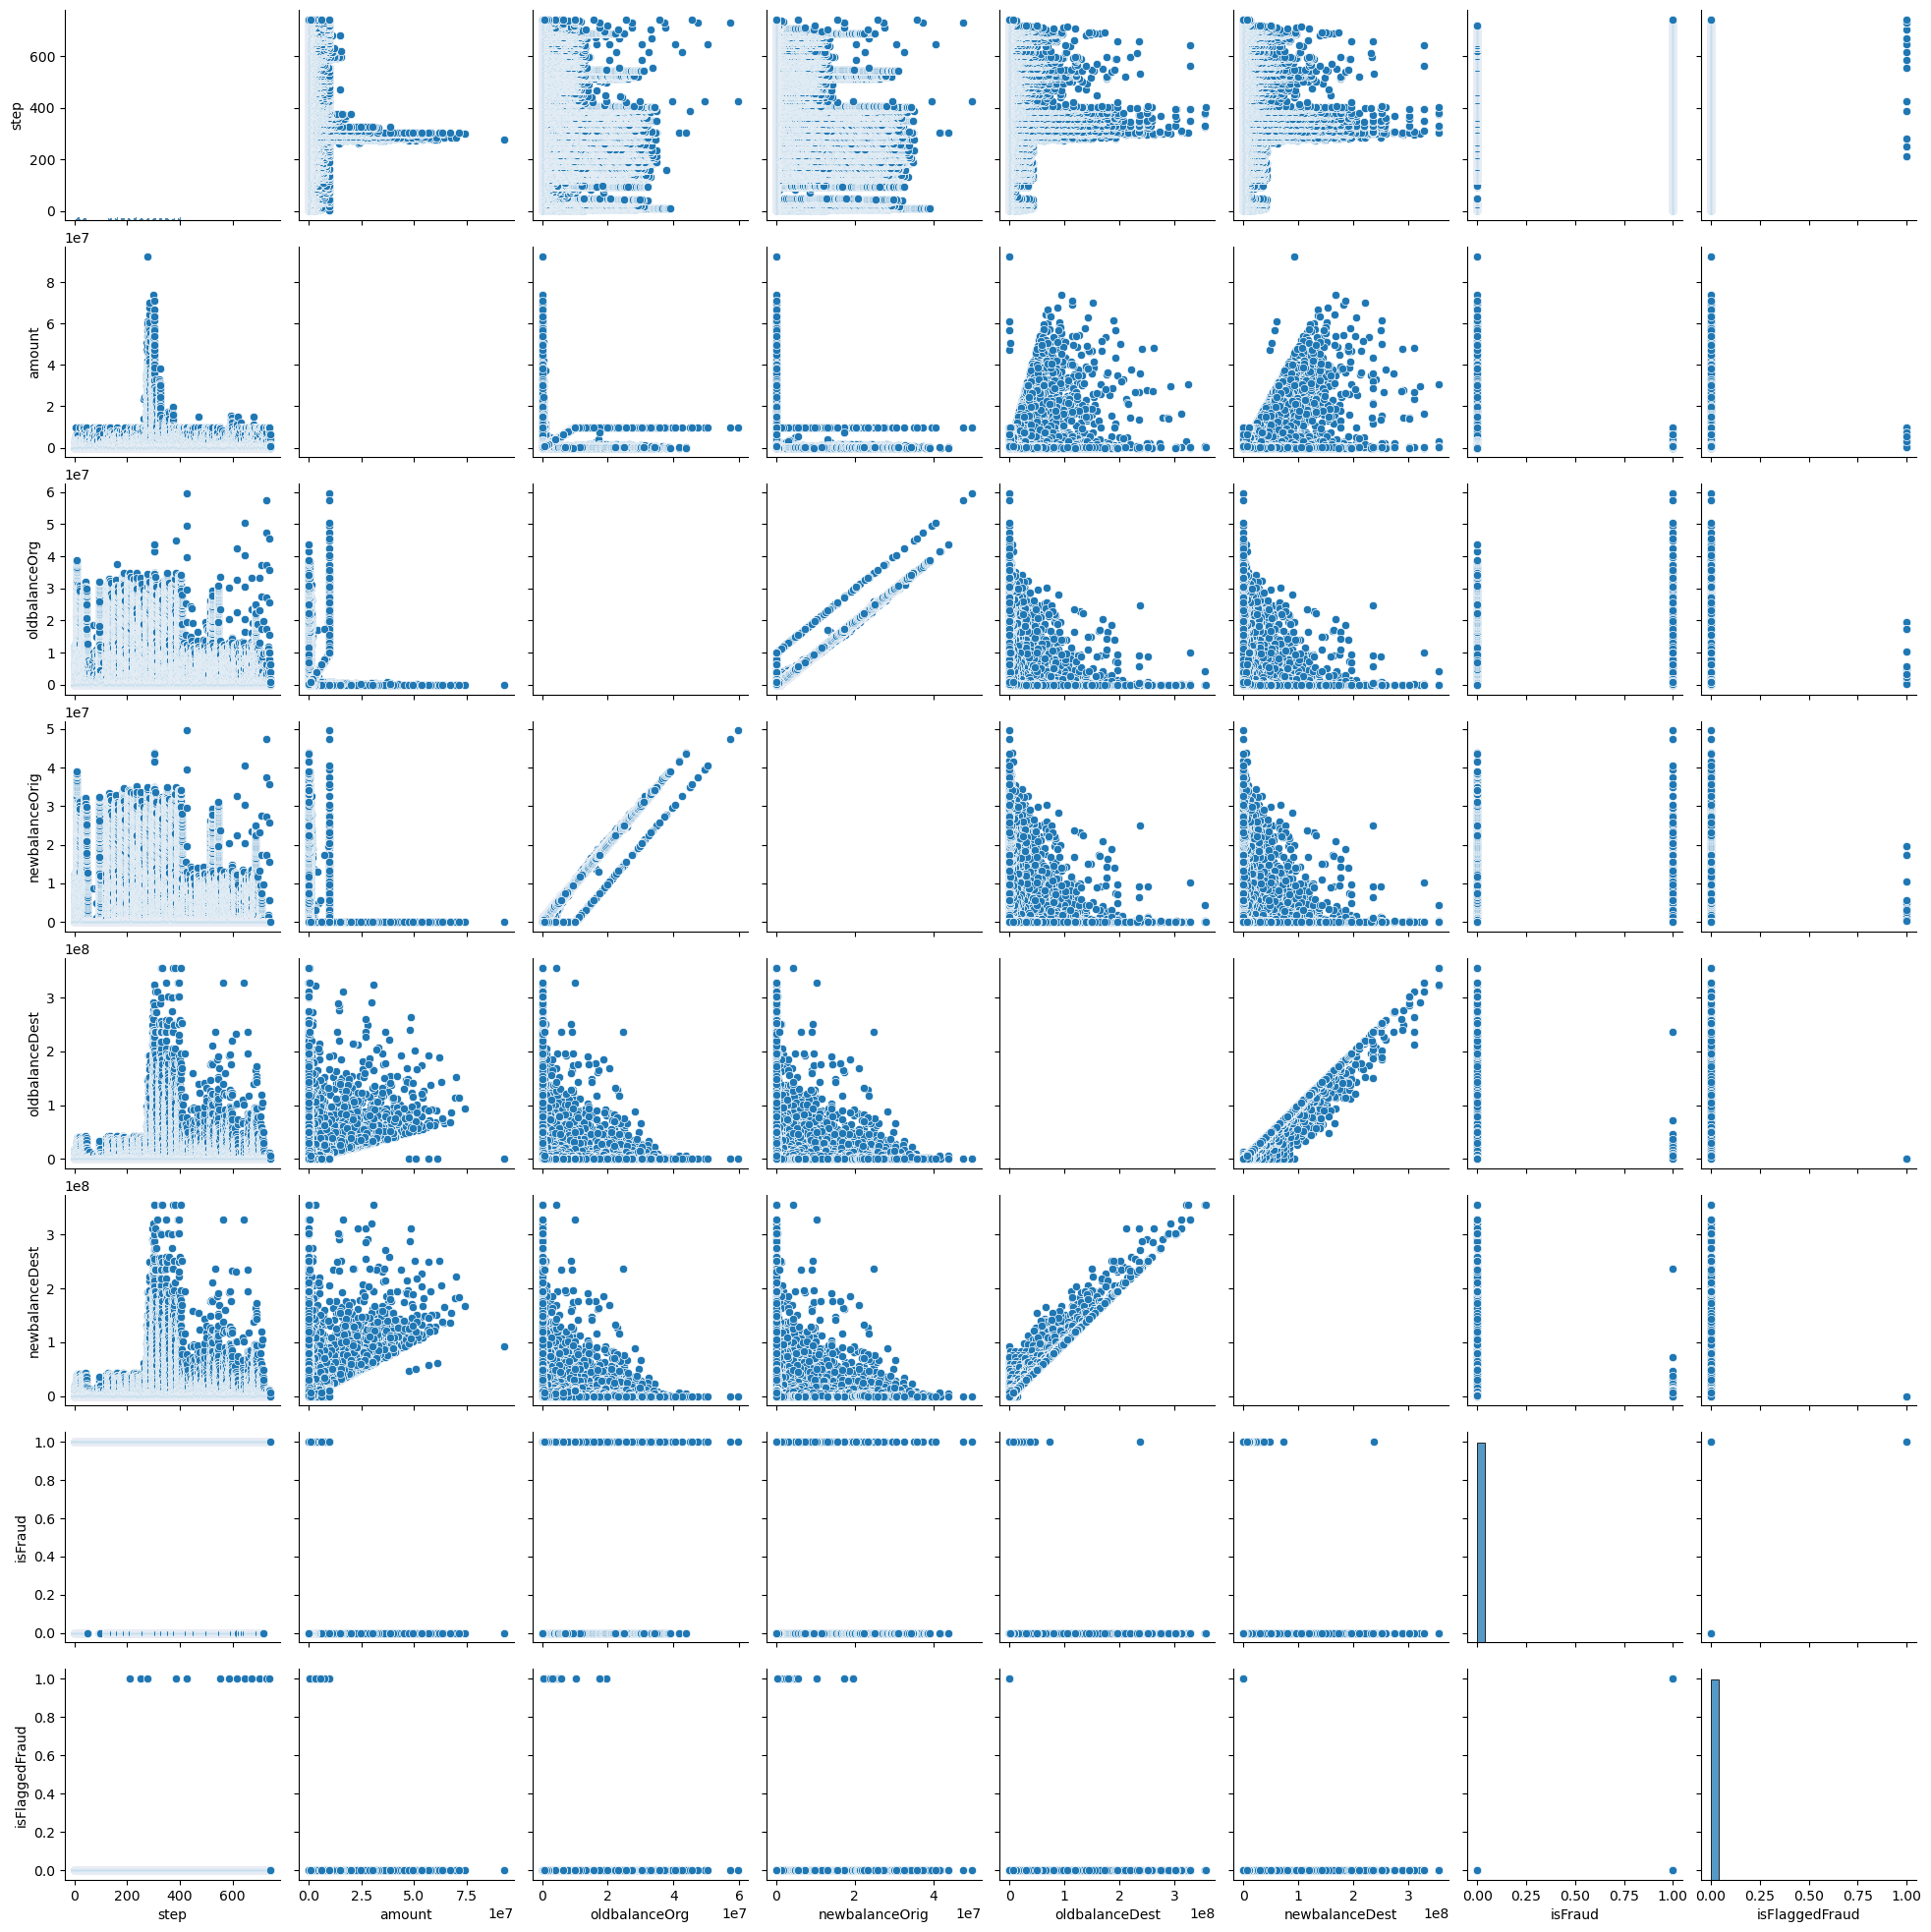

In [14]:
# Correlation Heatmap:
# A heatmap to understand the correlation between numerical features and potentially the isFraud label.
# This will help to see if any feature strongly correlates with the occurrence of fraud.
# Calculate the correlation matrix
correlations = df.corr(numeric_only=True)

# Plotting the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

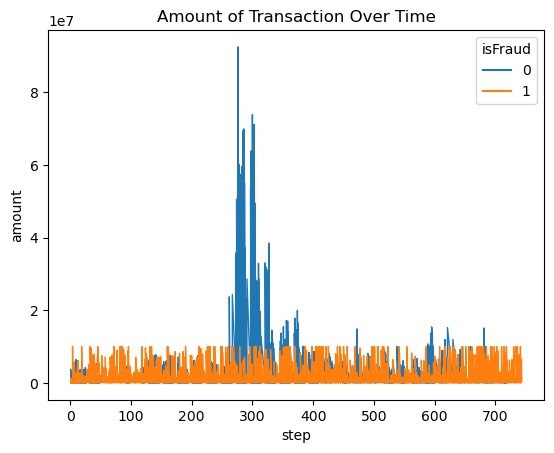

In [15]:
# Time Step Analysis:
# Plot the time step (step) against other features to understand if there's a pattern over time.
# For instance, you could plot a line or bar chart to see if fraud occurrences increase at certain time steps.

sns.lineplot(x='step', y='amount', data=df, hue='isFraud', estimator=None, lw=1)
plt.title('Amount of Transaction Over Time')
plt.show()

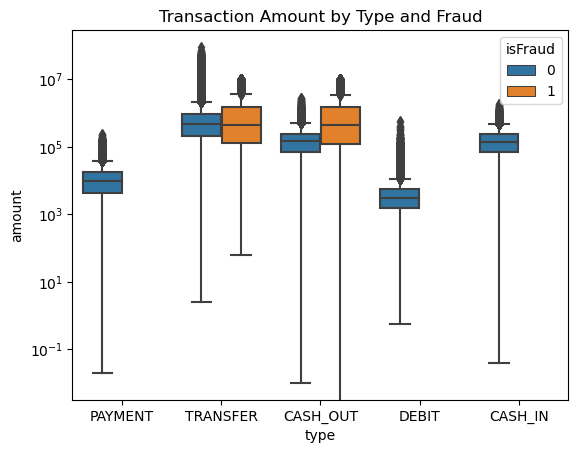

In [16]:
# Boxplots for Transaction Amount by Type:
# Boxplots grouped by transaction type and colored by fraud to see the distribution of amounts across different types of transactions and how they relate to fraud.
sns.boxplot(x='type', y='amount', data=df, hue='isFraud')
plt.title('Transaction Amount by Type and Fraud')
plt.yscale('log')  # Use log scale due to large range of transaction amounts
plt.show()

MemoryError: Unable to allocate 48.5 MiB for an array with shape (6362620,) and data type int64

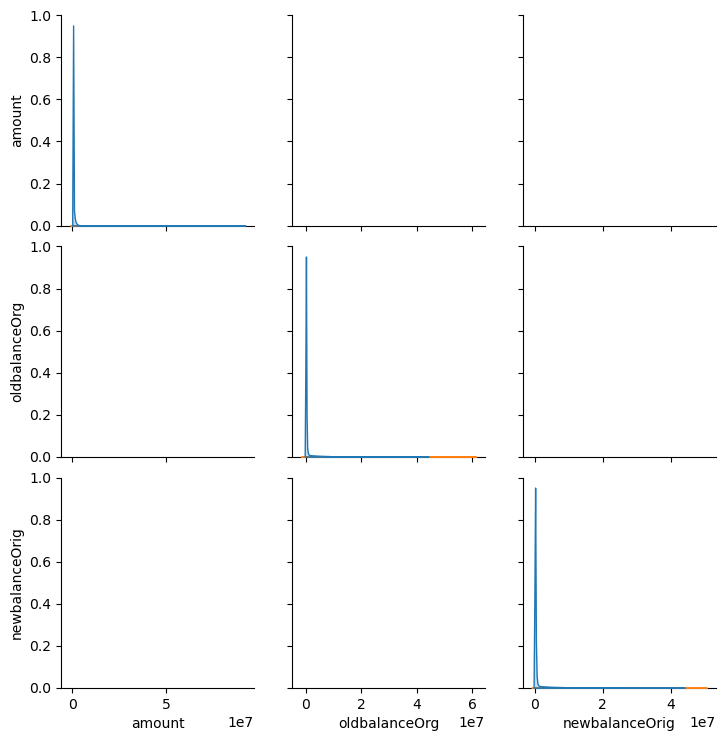

In [17]:
#  Pair Plot for Select Features:
# A pair plot of a few selected features could give insights into the relationships between them.
# You can color the points by the isFraud variable to see how fraudulent transactions may cluster.
sns.pairplot(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']], hue='isFraud')
plt.show()